<a href="https://colab.research.google.com/github/zeelShah-12/Machine_Learning/blob/main/OneHotEncoding_ML(Exercise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/carprice.csv")
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [ ]:
import seaborn as sns

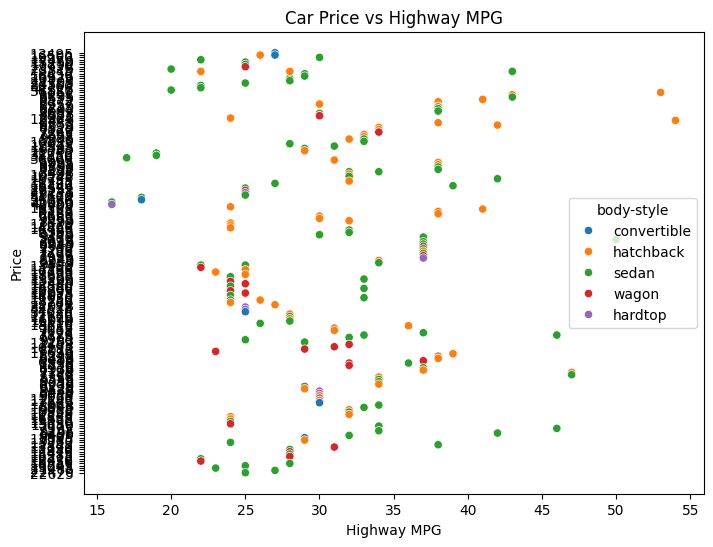

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['highway-mpg'],y=df['price'],hue=df['body-style'])
plt.title("Car Price vs Highway MPG")
plt.xlabel("Highway MPG")
plt.ylabel("Price")
plt.show()

In [ ]:
df.replace('?', pd.NA, inplace=True)

df.dropna(inplace=True)

In [ ]:
df.drop(columns=['bore'],inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
dummies = pd.get_dummies(df['stroke'],drop_first=True)
df = pd.concat([df,dummies],axis=1)
df.drop(columns=['stroke'],inplace=True)
(df.head())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,3.41,3.46,3.47,3.5,3.52,3.54,3.58,3.64,3.9,4.17
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,False,False,False,False,False,False,False,False,False,False
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,False,False,False,False,False,False,False,False,False,False
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,False,False,False,False,False,False,False,False,False,False
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,False,False,False,False,False,False,False,False,False,False
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X =df.drop(columns=['wheel-base'])
y=df['wheel-base']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
# Convert all column names to strings before fitting the model
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str) # Also convert for X_test to avoid issues during prediction

model = LinearRegression()
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'nissan'